# CSI acquisition overhead for symmetric network with equi-sized coalitions

In [1]:
using PyPlot

INFO: Loading help data...


## Scenario definition

In [2]:
I = 10; Kc = 1
M = 5; N = 5
d = 1;
vs_kmh = [5, 30, 50, 90]; # Speeds in [km/h]

fc = 2e9; # Carrier frequency [Hz]
Wc = 300e3; # Coherence bandwith in [Hz]

# This is given by IA feasibility
max_cluster_size = 9

9

## Simulation stuff

In [3]:
vs = 1e3/3600*vs_kmh; # in [m/s]
λ = 300e6/fc; # Wavelength [m]
fds = vs/(λ*Wc); # normalized Doppler spreads
Tcs = ceil(1./(2fds))

4-element Array{Float64,1}:
 16200.0
  2700.0
  1620.0
   900.0

## Orthogonal clustering

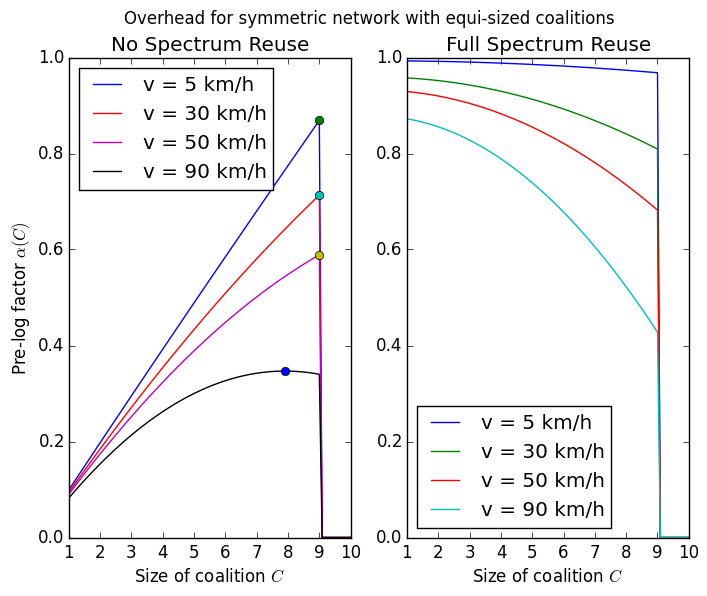

PyObject <matplotlib.text.Text object at 0x1146054d0>

In [6]:
subplot(1, 2, 1)
α(C, Tc) = begin
    alphas = zeros(C)
    for n = 1:length(C)
        if C[n] <= max_cluster_size
            alphas[n] = max(0, C[n]/I - (1/Tc)*(C[n]*(M + Kc*(N + d)) + C[n]^2*Kc*M))
        else
            alphas[n] = 0.
        end
    end
    alphas
end
Cs = linspace(1,I)
for idx = 1:length(Tcs)
    Tc = Tcs[idx]; v_kmh = vs_kmh[idx]
    plot(Cs, α(Cs, Tc), label=string("v = ", v_kmh, " km/h"))
    
    # Optimal cluster size
    opt_size = min((Tc - I*(M + Kc*(N + d)))/(2*I*Kc*M), max_cluster_size)
    opt_alpha = max(0, opt_size/I - (1/Tc)*(opt_size*(M + Kc*(N + d)) + opt_size^2*Kc*M))
    plot(opt_size, opt_alpha, "o")
end
title("No Spectrum Reuse")
xlabel(L"Size of coalition $C$")
ylabel(L"Pre-log factor $\alpha(C)$")
ylim(0,1)
legend(loc="best")

subplot(1, 2, 2)
α(C, Tc) = begin
    alphas = zeros(C)
    for n = 1:length(C)
        if C[n] <= max_cluster_size
            alphas[n] = max(0, 1 - (1/Tc)*(I*(M + Kc*(N + d)) + C[n]^2*Kc*M))
        else
            alphas[n] = 0.
        end
    end
    alphas
end
for idx = 1:length(Tcs)
    Tc = Tcs[idx]; v_kmh = vs_kmh[idx]
    plot(Cs, α(Cs, Tc), label=string("v = ", v_kmh, " km/h"))
end
title("Full Spectrum Reuse")
xlabel(L"Size of coalition $C$")
ylim(0,1)
legend(loc="best")

suptitle("Overhead for symmetric network with equi-sized coalitions")

In [5]:
Tcs

4-element Array{Float64,1}:
 16200.0
  2700.0
  1620.0
   900.0